# Multiple Linear Regression
## Bike-Sharing System Case Study
### Problem Statement:
 A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
 
#### Essentially, the company wants —

 - To know which variables are significant in predicting the demand for shared bikes.

 - To know how well those variables describe the bike demands

 - To know the accuracy of the model, i.e. how well these variables can predict bike demands.

#### So interpretation is important!


### The solution is divided into the following sections:

 - Data understanding and exploration
 - Data Visualisation
 - Data preparation
 - Model building and evaluation

# Step 1: Data understanding and exploration
Let us first import NumPy and Pandas and read the housing dataset

In [361]:
import pandas as pd
import numpy as np

In [362]:
# Filter warnings
import warnings
warnings.filterwarnings('ignore')

In [363]:
Shared_bike_Data = r'A:\Upgrad Data Science Course Content\Linear Regression\Linear Regression Assignment\day.csv'

In [364]:
Shared_bike_df = pd.read_csv(Shared_bike_Data)

In [365]:
# check the head of the dataset
Shared_bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [366]:
Shared_bike_df.shape

(730, 13)

In [367]:
Shared_bike_df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [368]:
Shared_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


In [369]:
Shared_bike_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### As we can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them so lets convert these feature values  into categorical string values 

#### Lets convert "workingday", "weathersit", "mnth", "weekday" and "season" into categorical string

In [370]:

Shared_bike_df['weathersit'] = Shared_bike_df['weathersit'].map({1: 'Clear', 2:'Mist&Cloudy', 3:'Light Snow', 4:'Heavy Rain'})
Shared_bike_df['mnth'] = Shared_bike_df['mnth'].map({1: 'Jan', 2:'Feb', 3:'Mar',4:'Apr', 5:'May', 6:'June', 7: 'July', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
Shared_bike_df['weekday'] = Shared_bike_df['weekday'].map({1: 'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursdy',5:'Friday', 6:'Saturday', 0:'Sunday'})
Shared_bike_df['season'] = Shared_bike_df['season'].map({1: 'Spring', 2:'Summer', 3:'Fall', 4:'winter'})

In [371]:
Shared_bike_df['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [372]:
Shared_bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,Spring,0,Jan,0,Saturday,0,Mist&Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,Spring,0,Jan,0,Sunday,0,Mist&Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [373]:
# Lets convert Date column to Date Format
Shared_bike_df['dteday'] = Shared_bike_df['dteday'].astype('datetime64')

In [374]:
# Lets convert the columns dtype of "yr" and "holiday" to category
Shared_bike_df['holiday'] = Shared_bike_df['holiday'].astype('category')
Shared_bike_df['yr'] = Shared_bike_df['yr'].astype('category')

#### Lets perform the Auto EDA using "sweet_report"

In [375]:
!pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(Shared_bike_df)
sweet_report.show_html("show_report.html")


Report show_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

 - If there is some obvious multicollinearity going on, this is the first place to catch it
 - Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

In [376]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Categorical Variables
As you might have noticed, there are a few categorical variables. Let's make a boxplot for some of these variables.

In [377]:
# Lets fetch the complete categorical columns
Shared_bike_df_catogorical = Shared_bike_df.select_dtypes(exclude = ['float64','datetime64','int64'])
print(Shared_bike_df_catogorical.columns)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit'], dtype='object')


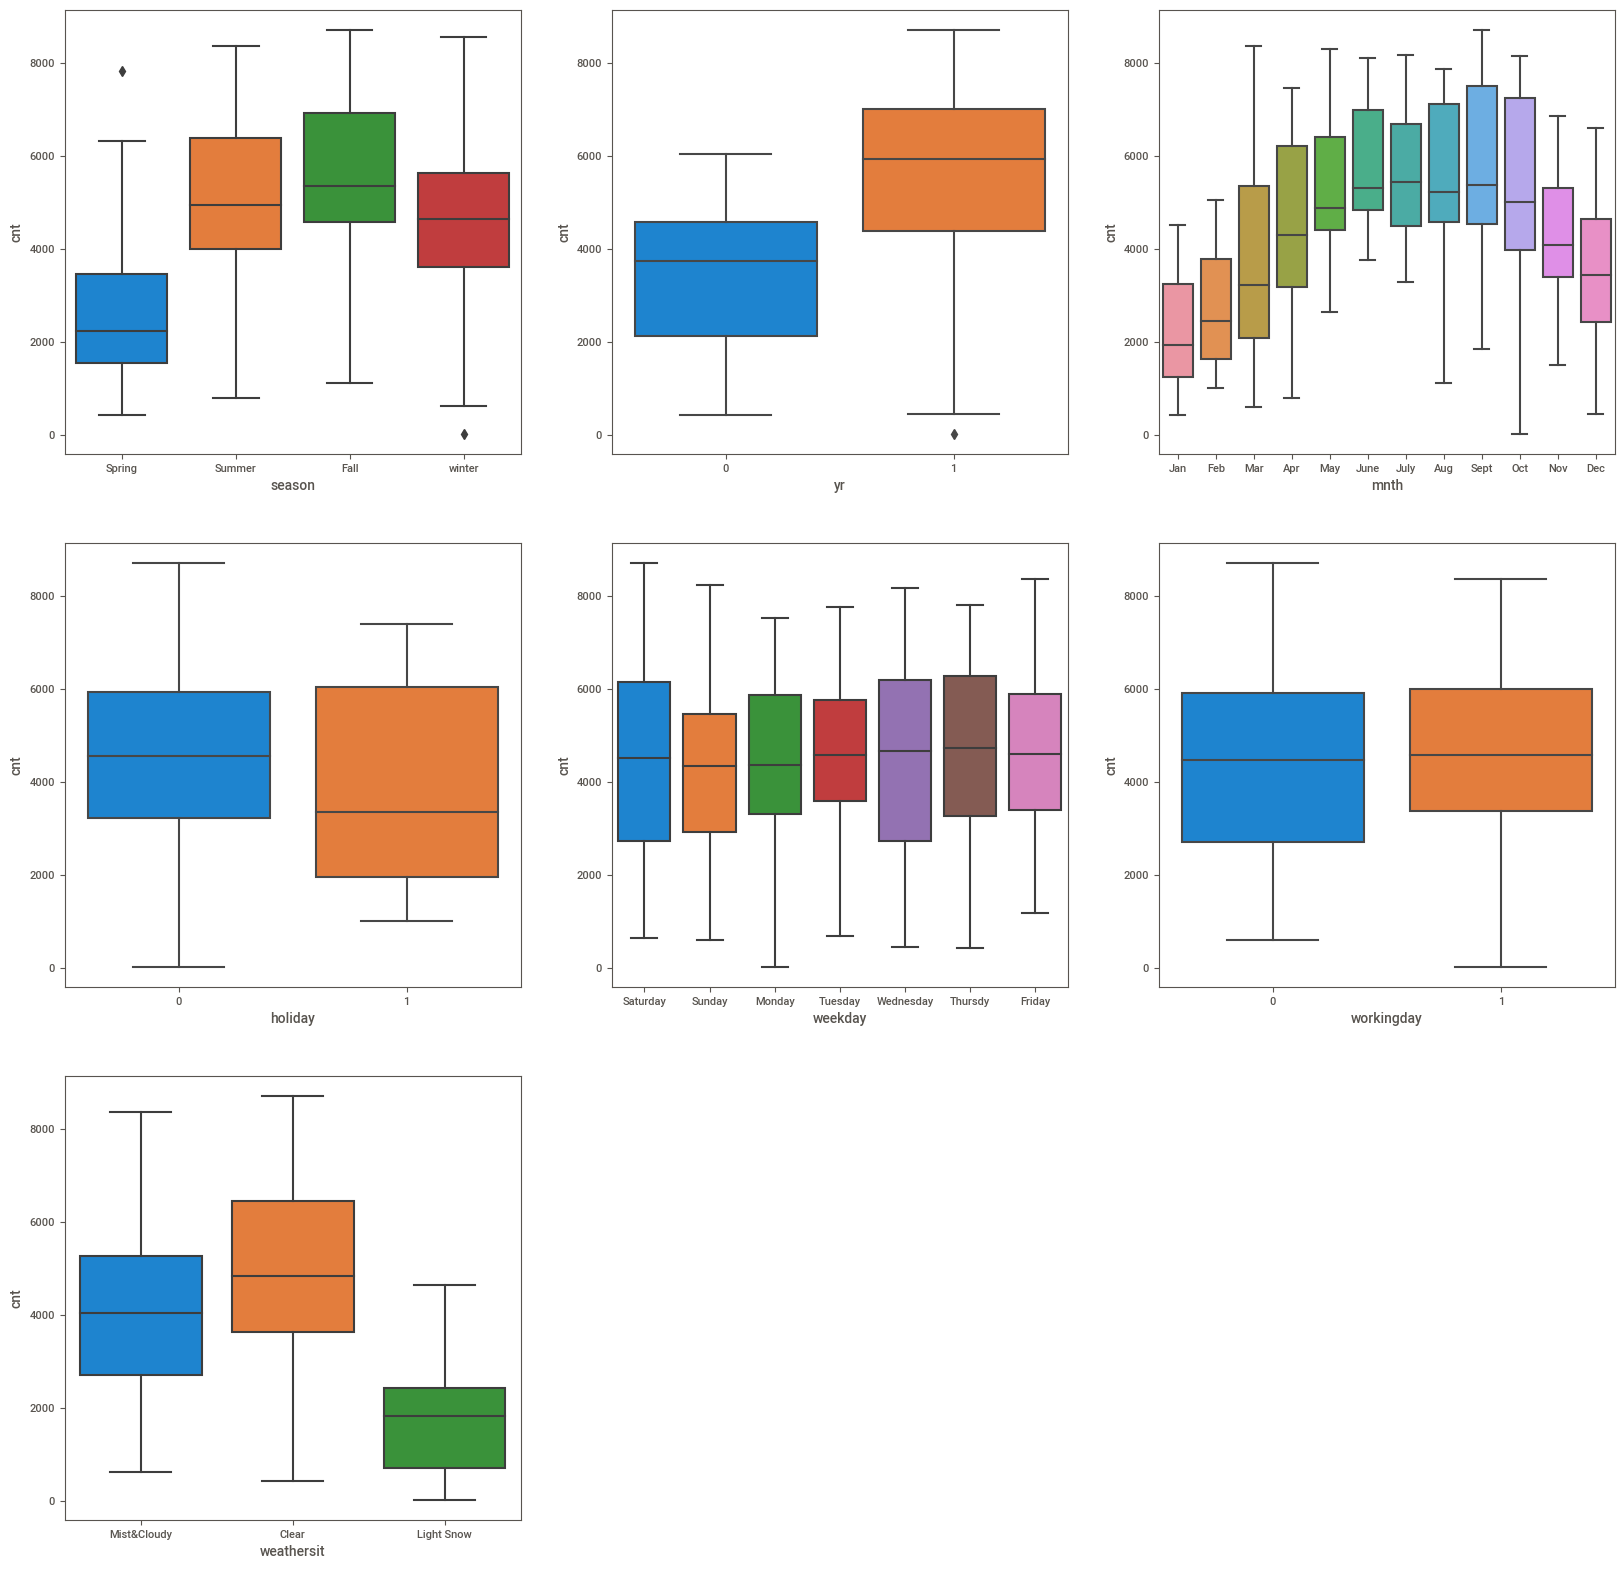

In [378]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season' , y = 'cnt', data = Shared_bike_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data =Shared_bike_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth' ,y = 'cnt', data = Shared_bike_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday' ,y = 'cnt', data = Shared_bike_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday' ,y = 'cnt', data = Shared_bike_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday' ,y = 'cnt', data = Shared_bike_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit' ,y = 'cnt', data = Shared_bike_df)
plt.show()

### Based on the Box plot below are the observation on Categorial Variable
 - In Season plot, we coluld clearly see that demand in Fall is much higher than in Spring
 - Holiday doesn't have much variation on the demand
 - Even Working Day, desn't have much impact on the demand
 - In Year, we could see that in 2019 the demand was higher than in 2018
 - In Month we could see from April to October there is preety good increase in demand
 - Also in Weekday we couldn't see much variation in the demand
 - In Weathersir, we could see that when the weather is clear the demand is higher

#### Visualising Numerical Variables
As you might have noticed, there are a few Numerical variables. Let's make a pairplot for some of these variables.

In [379]:
Shared_bike_df['cnt'] = Shared_bike_df['cnt'].astype('float')

In [380]:
Shared_bike_df_Numeric = Shared_bike_df.select_dtypes(include = ['float64'])

In [381]:
print(Shared_bike_df_Numeric.columns)

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')


In [382]:
Shared_bike_df_Numeric.head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985.0
1,14.902598,17.68695,69.6087,16.652113,801.0
2,8.050924,9.47025,43.7273,16.636703,1349.0
3,8.200000,10.60610,59.0435,10.739832,1562.0
4,9.305237,11.46350,43.6957,12.522300,1600.0


### Looking at the pair plot, we could see there is high correlation in temp and atemp

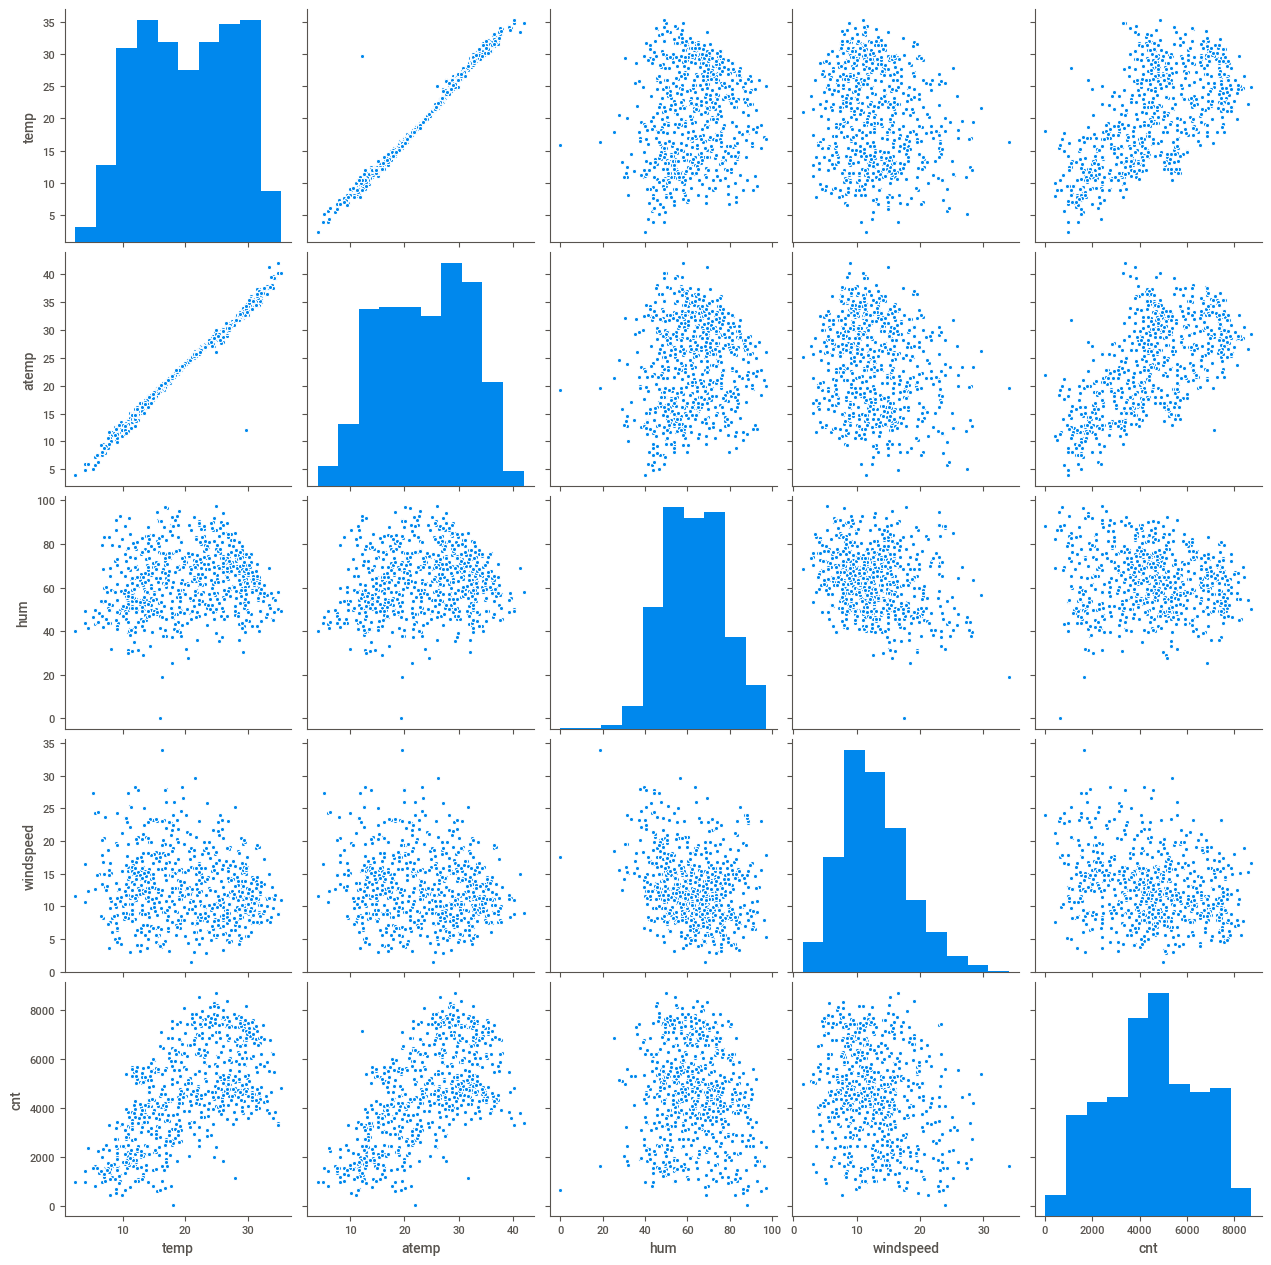

In [383]:
# pairwise plot
sns.pairplot(Shared_bike_df_Numeric)
plt.show()

#### To know the exact values of correlation between them, let's plot a heatmap which would be useful to visualise multiple correlations in one plot.

In [384]:
# Correlation Matrix
corr = Shared_bike_df_Numeric.corr()
corr

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


### Below are the observation on heatmap
Correlation of Count('cnt') with independent variables:
 - Count is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.
Correlation among independent variables:
 - Some of the independent variables are highly correlated : atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.

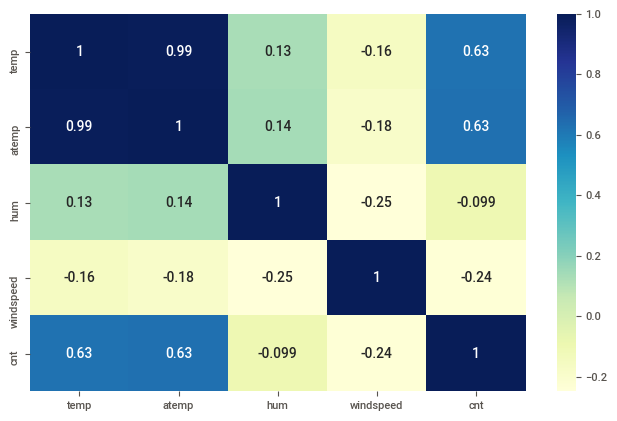

In [385]:
# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(Shared_bike_df_Numeric.corr(), annot=True, cmap = "YlGnBu")
plt.show()

In [386]:
# Looking at the above correlation we could remove atemp as it highly correlated with temp
Shared_bike_df.drop('atemp', axis=1, inplace = True)

# Step 3. Data Preparation

Lets now prepare the data and Build the mode.
 - Lets Create dummy variable for season,mnth,weekday and weathersit.
 - By creating the dummy variable we would have the numeric representation of the categorical variable

In [387]:
# Lets Subset all categorical Variables
# Subset all categorical variables
Shared_bike_categorical=Shared_bike_df.select_dtypes(include=['object'])

In [388]:
Shared_bike_categorical.head()

,season,mnth,weekday,weathersit
0,Spring,Jan,Saturday,Mist&Cloudy
1,Spring,Jan,Sunday,Mist&Cloudy
2,Spring,Jan,Monday,Clear
3,Spring,Jan,Tuesday,Clear
4,Spring,Jan,Wednesday,Clear


In [389]:
# Conver into dummies
Shared_bike_dummies = pd.get_dummies(Shared_bike_categorical, drop_first=True)
Shared_bike_dummies.head()

,season_Spring,season_Summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursdy,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist&Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


As we have the Dummy Vriable lets drop the categorical Variable

In [390]:
# Drop categorical variable columns
Shared_bike_df = Shared_bike_df.drop(list(Shared_bike_categorical.columns), axis=1)

In [391]:
# Concatenate dummy variables with the original df
Shared_bike_df = pd.concat([Shared_bike_df, Shared_bike_dummies], axis=1)

In [392]:
Shared_bike_df.head()

,dteday,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursdy,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist&Cloudy
0,2018-01-01,0,0,0,14.110847,80.5833,10.749882,985.0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,2018-02-01,0,0,0,14.902598,69.6087,16.652113,801.0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2018-03-01,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,2018-04-01,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2018-05-01,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [393]:
Shared_bike_df.shape

(730, 30)

In [394]:
Shared_bike_df['yr'] = Shared_bike_df['yr'].astype('int64')
Shared_bike_df['holiday'] = Shared_bike_df['holiday'].astype('int64')

In [395]:
# Lets drop dteday as it won't be of any use to build the model
Shared_bike_df=Shared_bike_df.drop(['dteday'], axis = 1, inplace = False)
Shared_bike_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursdy,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist&Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Step 4. Model Building and Evaluation

#### Before building the model below are the usual steps that needs to be followed
 - Split the data set into train test Split
 - standard splitting of data is in 70:30 or 80:20
 - Import the nesessary library for splitting

In [396]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(Shared_bike_df, train_size=0.7, test_size=0.3, random_state=100)

In [397]:
Shared_bike_df['cnt'] = Shared_bike_df['cnt'].astype('float')

In [398]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursdy,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist&Cloudy
653,1,0,1,19.201653,55.8333,12.208807,7534.0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,6664.0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
578,1,0,1,30.852500,65.9583,8.666718,7261.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,10.591653,56.0833,16.292189,2739.0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


### Scaling
Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

Let's scale all these columns using MinMaxScaler. You can use any other scaling method as well; it is totally up to you.

In [399]:
from sklearn.preprocessing import MinMaxScaler

In [400]:
scaler = MinMaxScaler()

In [401]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [402]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursdy,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist&Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [403]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursdy,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist&Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


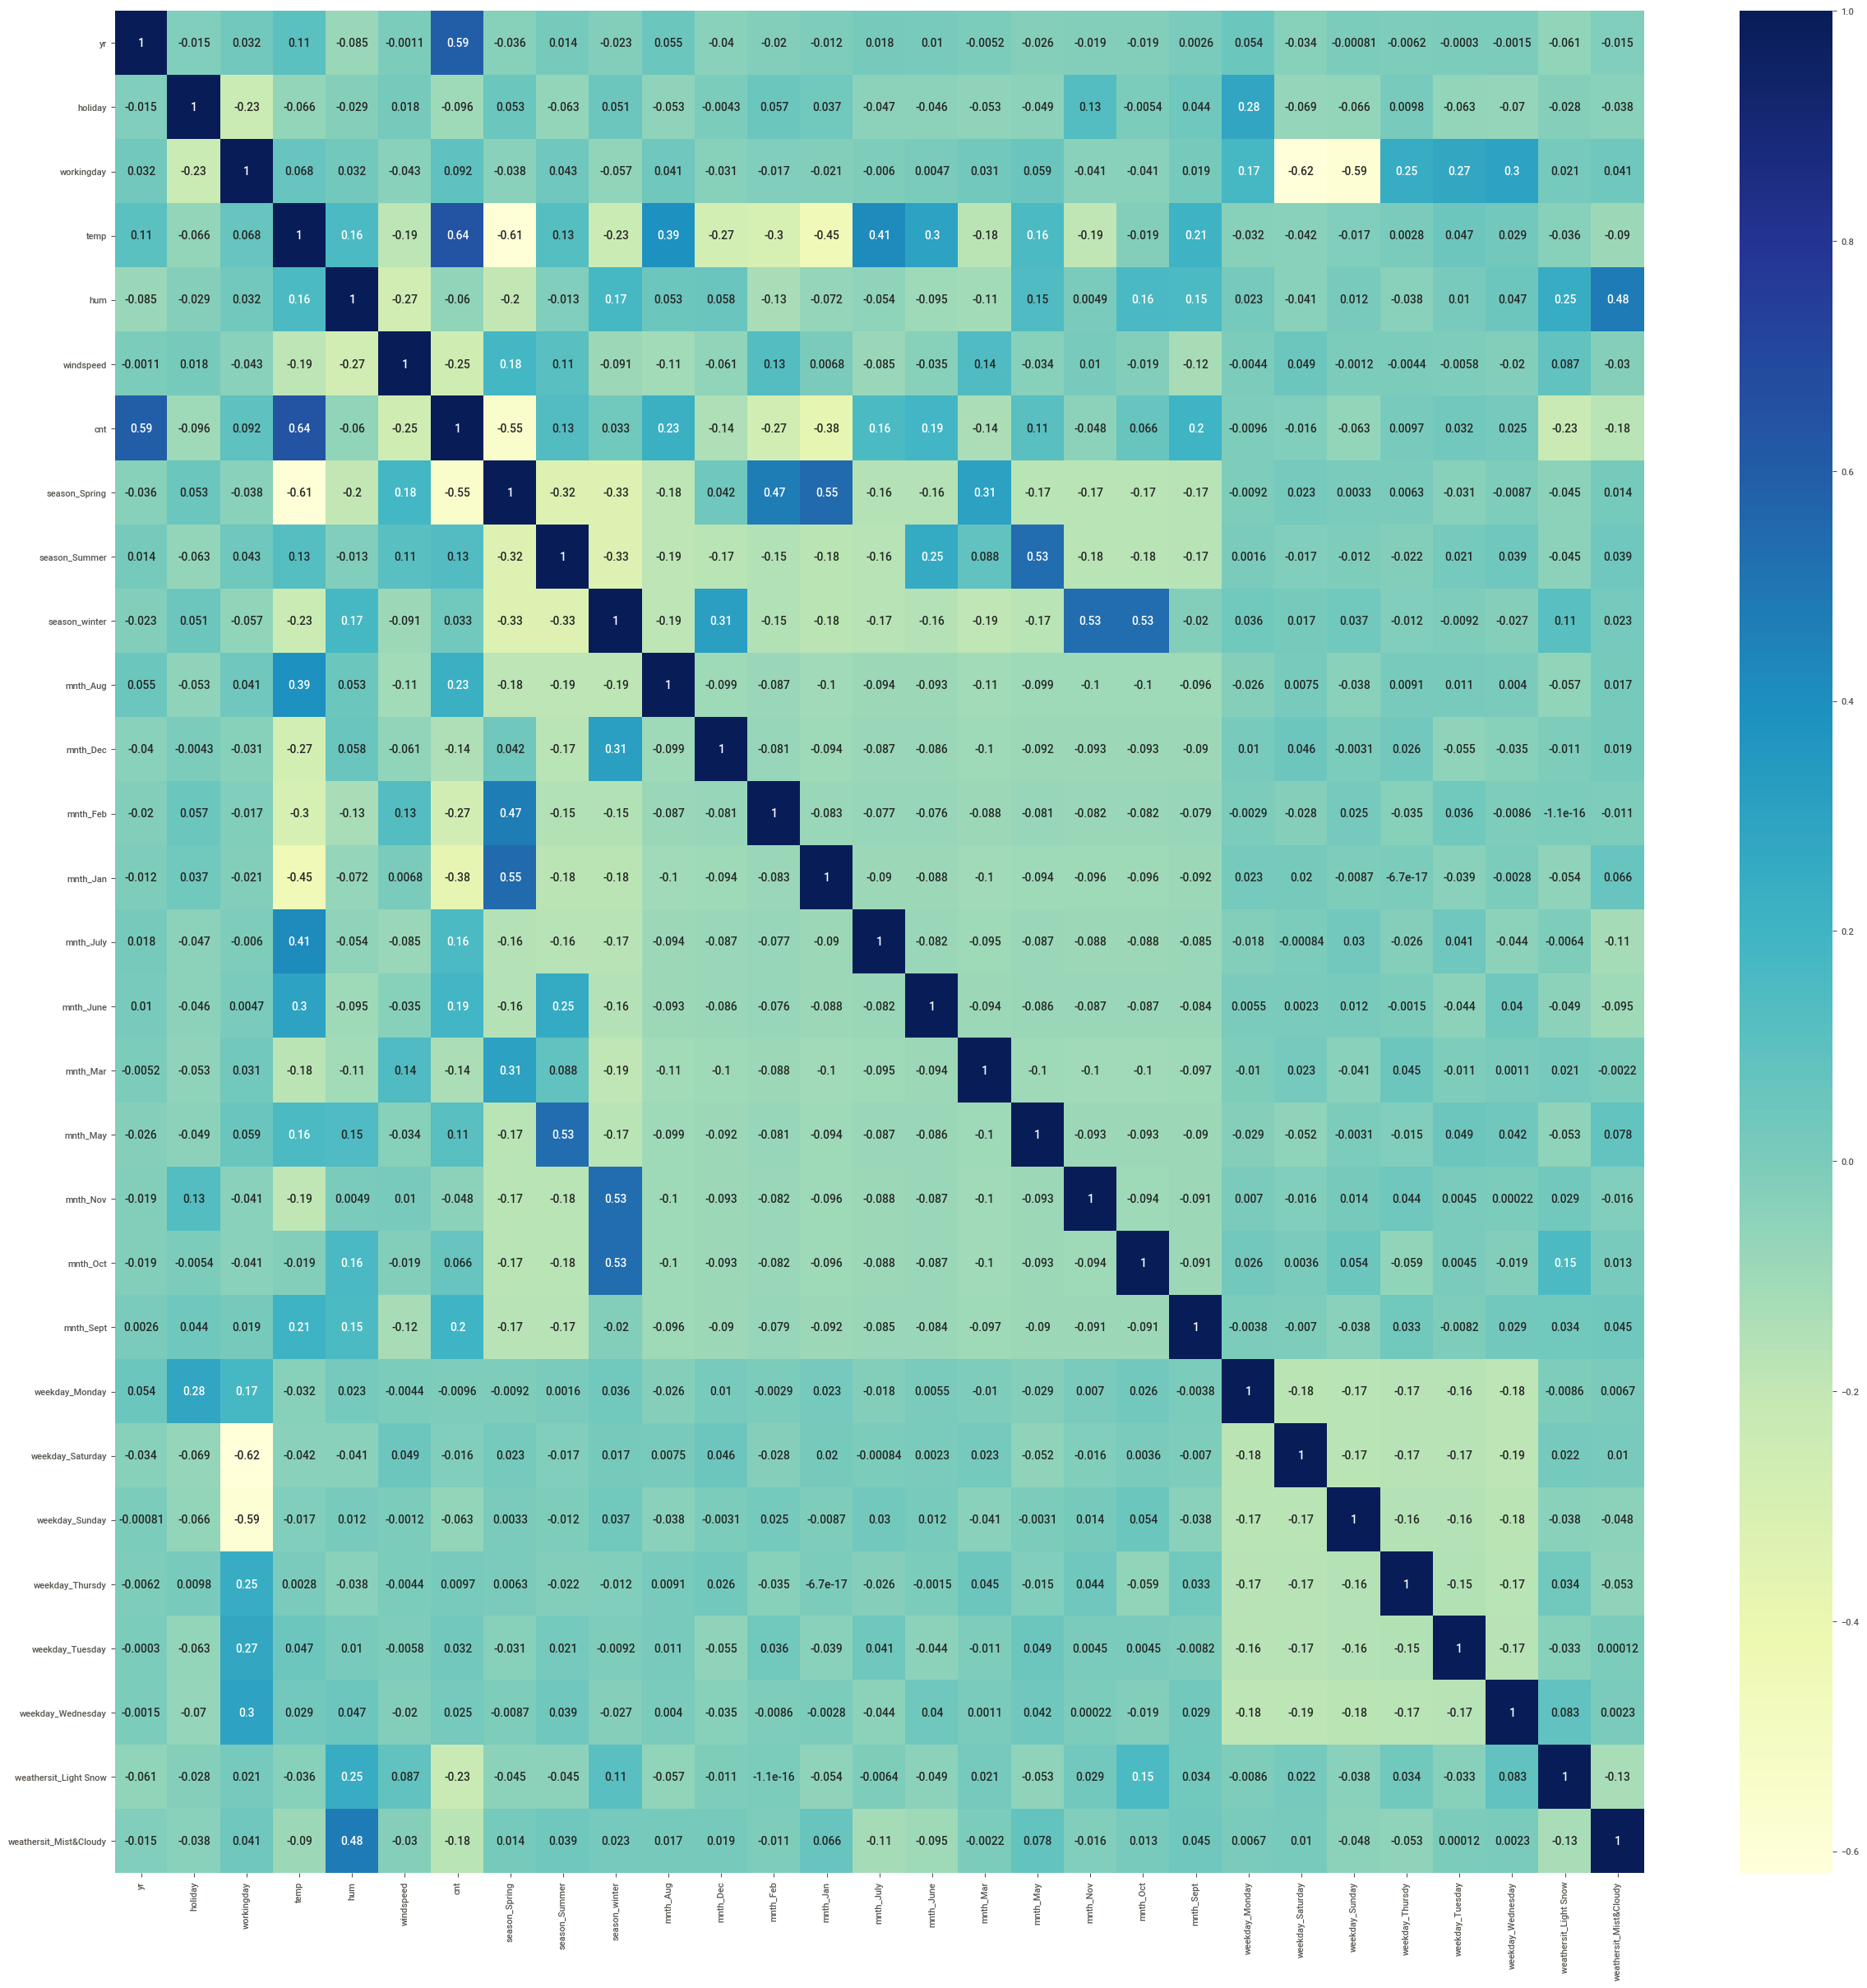

In [404]:
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")

As you might have noticed, temp seems to the correlated to cnt the most, after 'casual' and 'registered'. Let's see a pairplot for temp vs cnt.

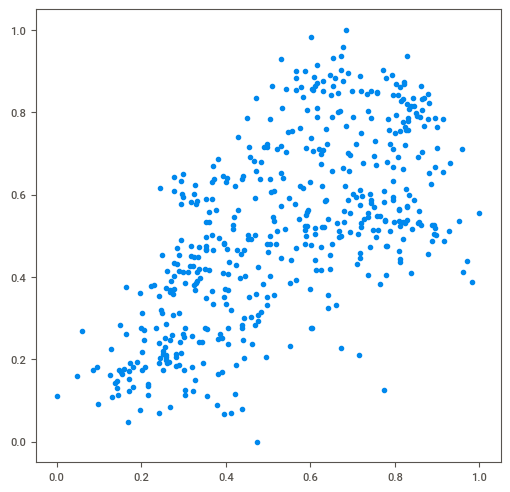

In [405]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

#### Dividing into X and Y sets for the model building

In [406]:
# Dropping 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop('cnt')
X_train = df_train

In [407]:
X_train.shape

(510, 28)

In [408]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursdy,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist&Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [409]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(df_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [410]:
X_train.shape

(510, 28)

### Building the first model with all the features

Let's now build our first model with all the features.

In [411]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const                     0.245085
yr                        0.232116
holiday                   0.009959
workingday                0.096884
temp                      0.450562
hum                      -0.151340
windspeed                -0.186453
season_Spring            -0.048159
season_Summer             0.038725
season_winter             0.105847
mnth_Aug                  0.014404
mnth_Dec                 -0.045586
mnth_Feb                 -0.032282
mnth_Jan                 -0.062777
mnth_July                -0.040350
mnth_June                -0.002972
mnth_Mar                  0.001045
mnth_May                  0.023940
mnth_Nov                 -0.041851
mnth_Oct                  0.007534
mnth_Sept                 0.081060
weekday_Monday           -0.020907
weekday_Saturday          0.096389
weekday_Sunday            0.041853
weekday_Thursdy          -0.009237
weekday_Tuesday          -0.018890
weekday_Wednesday        -0.005388
weathersit_Light Snow    -0.257443
weathersit_Mist&Clou

In [412]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sat, 18 Mar 2023   Prob (F-statistic):          8.74e-182
Time:                        11:11:50   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2451      0.035      6.955      0.000       0.176       0.314
yr                         0.2321      0.008     28.820      0.000       0.216       0.248
holiday                    0.0100      0.024      0.415      0.678      -0.037       0.057
workingday                 0.0969      0.012      7.905      0.000       0.073       0.121
temp                       0.4506      0.046      9.734      0.000       0.360       0.542
hum                       -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed                 -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_Spring             -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_Summer              0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter              0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug                   0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec                  -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb                  -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan                  -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_July                 -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_June                 -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar                   0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May                   0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov                  -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct                   0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sept                  0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Monday            -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_Saturday           0.0964      0.014      7.029      0.000       0.069       0.123
weekday_Sunday             0.0419      0.014      3.006      0.003       0.014       0.069
weekday_Thursdy           -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_Tuesday           -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_Wednesday         -0.0054      0.015     -0.362      0.718      -0.035       0.024
weathersit_Light Snow     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
weathersit_Mist&Cloudy    -0.0611      0.010     -5.854      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus)

### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model

In [413]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [414]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.58
21,weekday_Saturday,19.72
22,weekday_Sunday,18.35
6,season_Spring,10.79
8,season_winter,9.50
7,season_Summer,8.29
3,temp,7.12
17,mnth_Nov,6.80
18,mnth_Oct,6.59
9,mnth_Aug,6.43


#### Model Building Using RFE
Now, you have close to 28 features. So it is not recommended to manually eliminate these features. 
So let's build a model using recursive feature elimination to select features. Lets start with a random
number of features (15 seems to be a good number to begin with), and then use the statsmodels library 
to build models with the shortlisted features

In [416]:
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
RFE1 = RFE(lm, n_features_to_select = 15, step=1)

# fit the model with 15 features
RFE1.fit(X_train, y_train)

# Print the boolean results
print(RFE1.support_)           
print(RFE1.ranking_) 

[ True  True  True  True  True  True  True  True  True False False False
  True  True False False False False False  True False  True False False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  6  3  4  1  1 13 14  5  2 10  1  8  1  7 11
  9 12  1  1]


#### Model Building and Evaluation
Let's now check the summary of this model using statsmodels.

In [419]:
# Get the feature selected for rfe1
col1 = X_train.columns[RFE1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_winter,mnth_Jan,mnth_July,mnth_Sept,weekday_Saturday,weathersit_Light Snow,weathersit_Mist&Cloudy
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1


In [420]:
# Fit the Model
lm1 = sm.OLS(y_train, X_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sat, 18 Mar 2023   Prob (F-statistic):          2.31e-191
Time:                        11:19:17   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

As we colud see that selecting 15 features using RFE the accuracy has not gone in much dip. It has gone from 84.5% to 84.4%. This is indeed a good indication to proceed with these selected features.

But let's check for the multicollinearity among these variables.

In [425]:
sel_features = X_train_rfe1.drop('const',axis=1)

In [426]:
# Create a dataframe with a selected feature and their respective VIF's except for the constant
vif = pd.DataFrame()
vif['Features']  = sel_features.columns
vif['VIF'] = [variance_inflation_factor(sel_features.values, i) for i in range(sel_features.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_Spring,4.53
8,season_winter,3.48
7,season_Summer,2.84
14,weathersit_Mist&Cloudy,2.29
0,yr,2.09
12,weekday_Saturday,1.98


In [427]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 8 features
lm = LinearRegression()
rfe2 = RFE(lm, 8)

# Fit with 8 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True  True False  True  True  True  True False False False False False
 False  True False False False False False False False False False False
 False False  True False]
[ 1  1  7  1  1  1  1  5  2 13 10 11  8  1 20 21 12  9 17  3 15  6 14 18
 16 19  1  4]


In [428]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 8 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,temp,hum,windspeed,season_Spring,mnth_July,weathersit_Light Snow
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0


In [429]:
# Fitting the model with 8 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     278.0
Date:                Sat, 18 Mar 2023   Prob (F-statistic):          8.21e-179
Time:                        11:34:11   Log-Likelihood:                 470.39
No. Observations:                 510   AIC:                            -922.8
Df Residuals:                     501   BIC:                            -884.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.43

Now let's check the VIF for these selected features and decide further.

In [432]:
New_feature =X_train_rfe2.drop('const',axis=1)

In [433]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = New_feature.columns
vif['VIF'] = [variance_inflation_factor(New_feature.values, i) for i in range(New_feature.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.49
2,temp,10.38
4,windspeed,3.89
0,yr,2.03
5,season_Spring,1.80
6,mnth_July,1.35
7,weathersit_Light Snow,1.11
1,holiday,1.03


From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. But notice that there are a few variables which have VIF > 5. We need to deal with these variables carefully.

So let's try removing 'hum' first having the maximum VIF and then check for it again. Dropping this variable may result in a change in other VIFs which are high.


In [434]:
# Let's drop the 'hum' column
X_train_rfe2.drop("hum",axis=1,inplace=True)
X_train_rfe2

,const,yr,holiday,temp,windspeed,season_Spring,mnth_July,weathersit_Light Snow
653,1.0,1,0,0.509887,0.300794,0,0,0
576,1.0,1,0,0.815169,0.264686,0,1,0
426,1.0,1,0,0.442393,0.255342,1,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0


In [435]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     279.8
Date:                Sat, 18 Mar 2023   Prob (F-statistic):          9.08e-169
Time:                        11:37:54   Log-Likelihood:                 443.86
No. Observations:                 510   AIC:                            -871.7
Df Residuals:                     502   BIC:                            -837.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

The model seems to be doing a good job. Let's also quickly take a look at the VIF values

In [438]:
a=X_train_rfe2.drop('const',axis=1)


In [439]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.95
3,windspeed,3.73
0,yr,2.03
4,season_Spring,1.50
5,mnth_July,1.26
6,weathersit_Light Snow,1.05
1,holiday,1.03


All the VIF values and p-values seem to be in the permissible range now. Also the Adjusted R-squared value has dropped from 84.5% with 28 variables to 79.1% using 6 variables. This model is explaining most of the variance without being too complex. So let's proceed with this model.

## Residual Analysis
Before we make predictions on the test set, let's first analyse the residuals

In [440]:
y_train_cnt = lm3.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

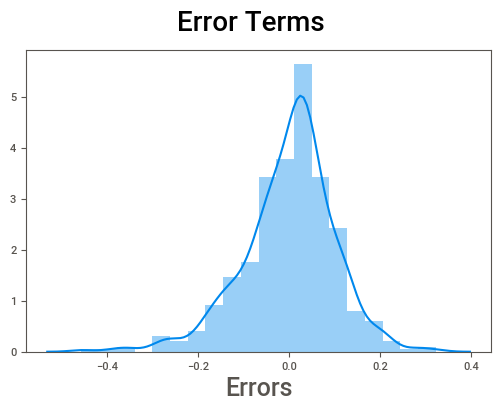

In [441]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)   

### Making Predictions
We would first need to scale the test set as well. So let's start with that.

In [442]:
X_train_rfe2

,const,yr,holiday,temp,windspeed,season_Spring,mnth_July,weathersit_Light Snow
653,1.0,1,0,0.509887,0.300794,0,0,0
576,1.0,1,0,0.815169,0.264686,0,1,0
426,1.0,1,0,0.442393,0.255342,1,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0


## Lets Scale teh variable before prediction

In [443]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','cnt']

In [444]:
df_test[var] = scaler.transform(df_test[var])

In [445]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')

In [446]:
X_test = df_test

In [447]:
# Let's check the list 'col2' which had the 6 variables RFE had selected
Vif_cols=a.columns
Vif_cols

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_Spring', 'mnth_July',
       'weathersit_Light Snow'],
      dtype='object')

In [449]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe2 = X_test[Vif_cols]

In [451]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.head()

,const,yr,holiday,temp,windspeed,season_Spring,mnth_July,weathersit_Light Snow
184,1.0,0,1,0.831783,0.084219,0,1,0
535,1.0,1,0,0.901354,0.153728,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,0
221,1.0,0,0,0.881625,0.339570,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0


In [452]:
# Making predictions
y_pred = lm3.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

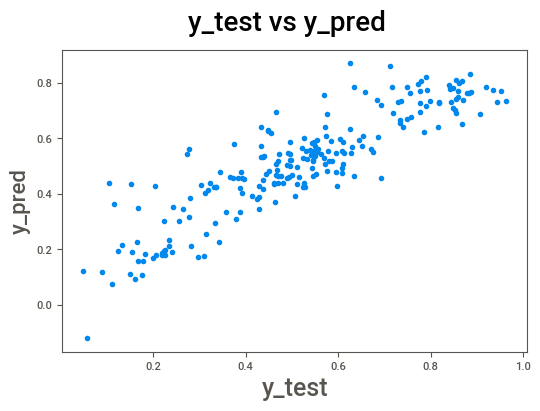

In [453]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

#### From the above graph it is cleared that model is performing well on the test data

In [454]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7835777059426585

Thus, for the model with 7 variables, the r-squared on training and test data is about 79.6% and 78.35% respectively

#### Checking the correlations between the final predictor variables

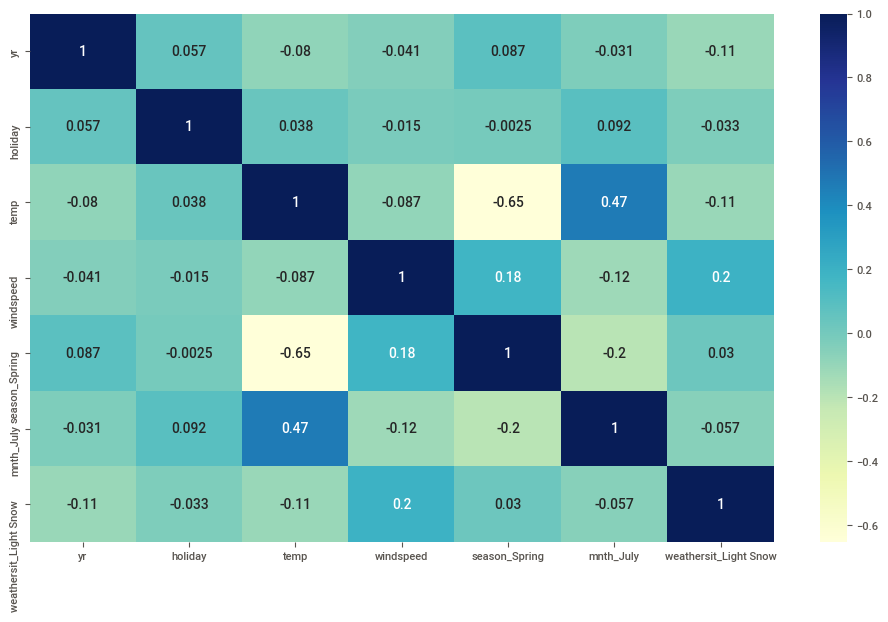

In [456]:
# Figure size
plt.figure(figsize=(12,7))

# Heatmap
sns.heatmap(X_test_rfe2[Vif_cols].corr(), cmap="YlGnBu", annot=True)
plt.show()